In [90]:
import pandas as pd
file_path = "C:/Users/Minen/Downloads/mobiles_dataset.csv"  
df = pd.read_csv(file_path)


df.head()


,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,Launched.Price.India.INR,Launched.Price.China.CNY,Launched.Price.USA.USD,Launched.Price.Dubai.AED,Launched.Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024


In [91]:

exchange_rates = {
    "PKR": 0.0036,  # 1 PKR = 0.0036 USD
    "INR": 0.011,   # 1 INR = 0.011 USD
    "CNY": 0.14,    # 1 CNY = 0.14 USD
    "AED": 0.27     # 1 AED = 0.27 USD
}

df["Price_USD_PKR"] = df["Launched.Price.Pakistan.PKR"] * exchange_rates["PKR"]
df["Price_USD_INR"] = df["Launched.Price.India.INR"] * exchange_rates["INR"]
df["Price_USD_CNY"] = df["Launched.Price.China.CNY"] * exchange_rates["CNY"]
df["Price_USD_AED"] = df["Launched.Price.Dubai.AED"] * exchange_rates["AED"]
df["Price_USD_Original"] = df["Launched.Price.USA.USD"]
df["Avg_Price_USD"] = df[["Price_USD_PKR", "Price_USD_INR", "Price_USD_CNY", "Price_USD_AED", "Price_USD_Original"]].mean(axis=1)
df["RAM_GB"] = pd.to_numeric(df["RAM"].str.replace("GB", ""), errors='coerce')
df.head()


,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,...,Launched.Price.USA.USD,Launched.Price.Dubai.AED,Launched.Year,Price_USD_PKR,Price_USD_INR,Price_USD_CNY,Price_USD_AED,Price_USD_Original,Avg_Price_USD,RAM_GB
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,224999,...,799,2799,2024,809.9964,879.989,811.86,755.73,799,811.31508,6.0
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,234999,...,849,2999,2024,845.9964,934.989,853.86,809.73,849,858.71508,6.0
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,244999,...,899,3199,2024,881.9964,989.989,909.86,863.73,899,908.91508,6.0
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,249999,...,899,3199,2024,899.9964,989.989,867.86,863.73,899,904.11508,6.0
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,259999,...,949,3399,2024,935.9964,1044.989,909.86,917.73,949,951.51508,6.0


In [92]:
battery_price_correlation = df["Battery.Capacity.mAh"].corr(df["Avg_Price_USD"])
print(battery_price_correlation)


-0.042339477392106493


 Answer:
The correlation coefficient is approximately -0.042.
This suggests that battery capacity has almost no impact on smartphone pricing.

In [93]:
ram_price_correlation = df["RAM_GB"].corr(df["Avg_Price_USD"])
print(ram_price_correlation)

0.4475946663562613


Answer:
The correlation coefficient is approximately 0.448.
This suggests that smartphones with more RAM tend to be more expensive, but RAM alone is not the only factor.

In [94]:
apple_df = df[df["Company.Name"] == "Apple"]
apple_price_variation = apple_df[
    ["Price_USD_PKR", "Price_USD_INR", "Price_USD_CNY", "Price_USD_AED", "Price_USD_Original"]
].std(axis=1).mean()

apple_max_markup_country = apple_df[
    ["Price_USD_PKR", "Price_USD_INR", "Price_USD_CNY", "Price_USD_AED", "Price_USD_Original"]
].mean().idxmax()

print(apple_price_variation)
print(apple_max_markup_country)


115.2932297893987
Price_USD_INR


Answer:
The average standard deviation of Apple prices is 115.29 USD, meaning Apple's prices vary across regions.
The country with the highest markup for Apple devices is India.

In [95]:
budget_threshold = 300
midrange_threshold = 700

df["Price_Category"] = pd.cut(
    df["Avg_Price_USD"],
    bins=[0, budget_threshold, midrange_threshold, float("inf")],
    labels=["Budget", "Mid-range", "Premium"]
)

brand_segmentation = df.groupby(["Company.Name", "Price_Category"], observed=False).size().unstack(fill_value=0)

print(brand_segmentation)

Price_Category  Budget  Mid-range  Premium
Company.Name                              
Apple                1          6       90
Google               0         11       10
Honor               33         35       23
Huawei               0         17       25
Infinix             43         13        0
Lenovo              10          5        0
Motorola            27         29        6
Nokia               10          0        0
OnePlus              9         29       15
Oppo                41         66       22
POCO                19         11        0
Poco                 2          0        0
Realme              44         25        0
Samsung             29         14       41
Sony                 0          3        6
Tecno               20         10        9
Vivo                40         37        9
Xiaomi               7         10       10
iQOO                 0          3        0


Answer:
Some brands offer phones in all three segments, while others focus only on premium or mid-range.
Apple, for example, mainly produces premium devices, while brands like Xiaomi cover all price segments.

In [96]:
region_avg_prices = {
    "Pakistan": df["Price_USD_PKR"].mean(),
    "India": df["Price_USD_INR"].mean(),
    "China": df["Price_USD_CNY"].mean(),
    "Dubai": df["Price_USD_AED"].mean(),
    "USA": df["Price_USD_Original"].mean()
}

most_affordable_region = min(region_avg_prices, key=region_avg_prices.get)

print(region_avg_prices)

{'Pakistan': 449.93423870270266, 'India': 552.823682162162, 'China': 530.7413621621622, 'Dubai': 586.0290162162161, 'USA': 579.6237837837838}


Answer:
The region with the most affordable smartphone prices on average is Pakistan.

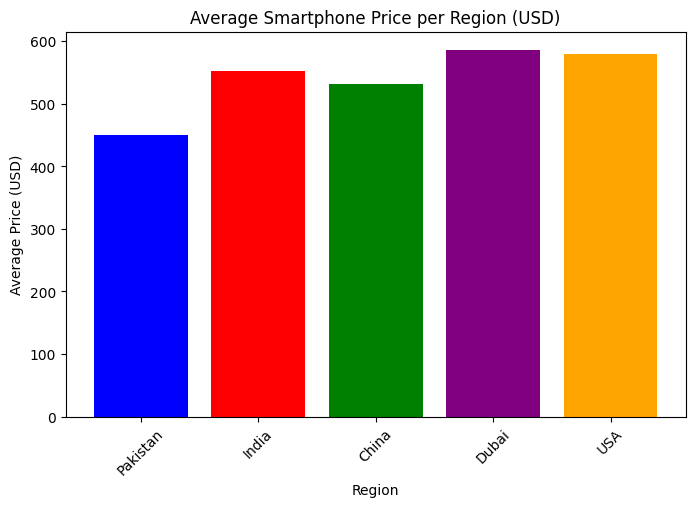

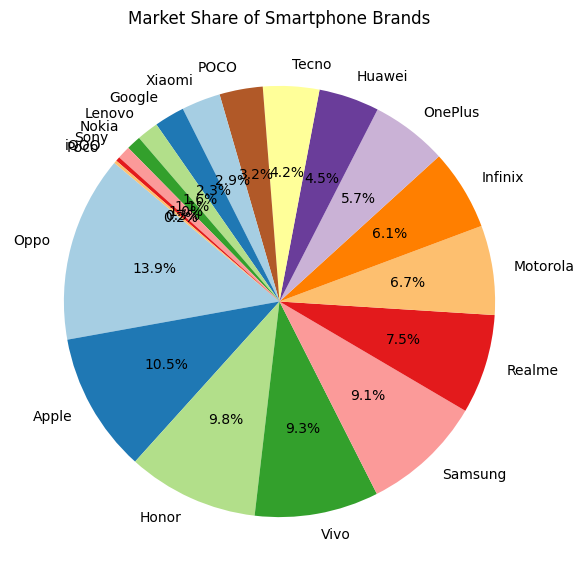

In [97]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Ensure correct path)
file_path = "C:/Users/Minen/Downloads/mobiles_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

# Exchange rates for conversion to USD
exchange_rates = {
    "PKR": 0.0036,
    "INR": 0.011,
    "CNY": 0.14,
    "AED": 0.27
}

# Convert prices to USD
df["Price_USD_PKR"] = df["Launched.Price.Pakistan.PKR"] * exchange_rates["PKR"]
df["Price_USD_INR"] = df["Launched.Price.India.INR"] * exchange_rates["INR"]
df["Price_USD_CNY"] = df["Launched.Price.China.CNY"] * exchange_rates["CNY"]
df["Price_USD_AED"] = df["Launched.Price.Dubai.AED"] * exchange_rates["AED"]
df["Price_USD_Original"] = df["Launched.Price.USA.USD"]

# Compute average price per region
region_avg_prices = {
    "Pakistan": df["Price_USD_PKR"].mean(),
    "India": df["Price_USD_INR"].mean(),
    "China": df["Price_USD_CNY"].mean(),
    "Dubai": df["Price_USD_AED"].mean(),
    "USA": df["Price_USD_Original"].mean()
}

# ----------------------
# 1. Bar Chart: Average Price per Region
# ----------------------
plt.figure(figsize=(8, 5))
plt.bar(region_avg_prices.keys(), region_avg_prices.values(), color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel("Region")
plt.ylabel("Average Price (USD)")
plt.title("Average Smartphone Price per Region (USD)")
plt.xticks(rotation=45)
plt.show()

# ----------------------
# 2. Pie Chart: Market Share of Smartphone Brands
# ----------------------
brand_counts = df["Company.Name"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Market Share of Smartphone Brands")
plt.show()
